# James Jones
## 11-28-2022

In [10]:
# Import Libraries and load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Dataset/Medical-data')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


### We will analyze the following features:
- VitD_levels
- Doc_visits
- TotalCharge

#### First, some basic data cleaning

In [2]:
df.duplicated().sum()

0

In [3]:
df.isna().sum()

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [4]:
df.dropna(inplace = True)
df.isna().sum()

State                 0
Lat                   0
Lng                   0
Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [5]:
# Assign collumns to plot to variables
vit_d = df['VitD_levels']
vit_d.head()

0    19.141466
1    18.940352
2    18.057507
3    16.576858
5    19.612646
Name: VitD_levels, dtype: float64

In [7]:
visits = df['Doc_visits']
visits.head()

0    6
1    4
2    4
3    4
5    6
Name: Doc_visits, dtype: int64

In [9]:
charge = df['TotalCharge']
charge.head()

0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
5    2636.691180
Name: TotalCharge, dtype: float64

### For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)

2. Answer the following questions:
- Is it Discrete or Continuous?
- Does it have a skew? If so, which direction (+/-)
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

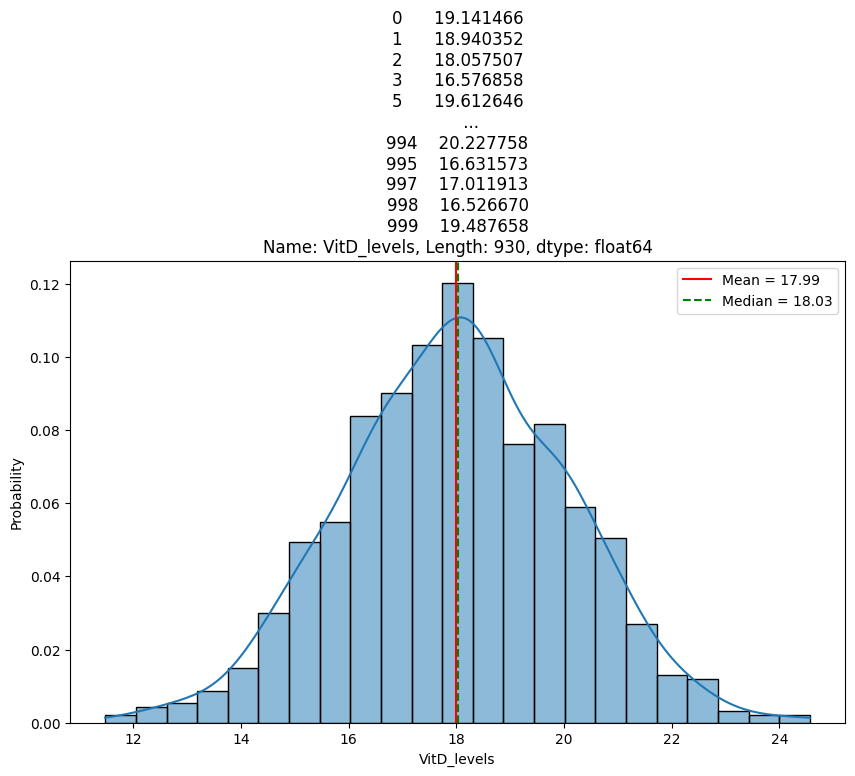

In [23]:
# Plot first histogram for "VitD_levels"

feature = vit_d # Assing to feature to more easily reproduce code with other columns
mean = feature.mean() # Assign mean to a variable
median = feature.median() # Assign median to a variable

# Create the actual plot
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(feature ,ax = ax, stat = 'probability', kde = True) # Specify 'kde'

# Add lines for mean and median
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls = '--', color = 'green', label = f'Median = {median:,.2f}')
ax.set_title(f'{feature}')
ax.legend();

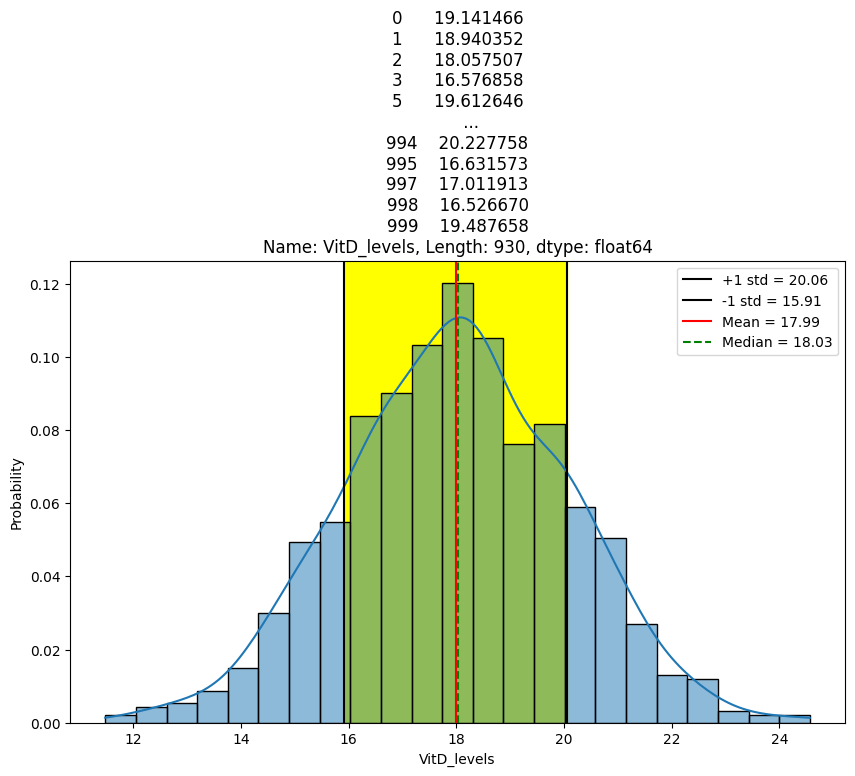

In [32]:
# Now, finish the hisogram with standard deviation

feature = vit_d
mean = feature.mean()
median = feature.median()
std = feature.std()# Assign standard deviation to a viable
plus_1_std = mean + std # Assign plus one standard deviation
minus_1_std = mean - std # Assign minus 1 standard deviation

# Create the actual plot
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(feature ,ax = ax, stat = 'probability', kde = True)

# Add lines for std
ax.axvline(plus_1_std, color = 'black', label = f'+1 std = {plus_1_std:,.2f}')
ax.axvline(minus_1_std, color = 'black', label = f'-1 std = {minus_1_std:,.2f}')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls = '--', color = 'green', label = f'Median = {median:,.2f}')

# Specify z-order to highlight area between +1 and -1 std
ax.axvspan(plus_1_std, minus_1_std, color = 'yellow', zorder = 0)
ax.set_title(f'{feature}')

# Legend automatically updates to include std
ax.legend();

#### We can now use the above code to reproduce this style of histogram for our other 2 columns, while only updating "feature = column
### Let's answer the questions posed to us for this histogram:
- Is it Discrete or Continuous?
  - This data is **Continuous** 
- Does it have a skew? If so, which direction (+/-)
  - This data is **NOT skewed**
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
  - This data displays **Mesokuric** Kurtosis

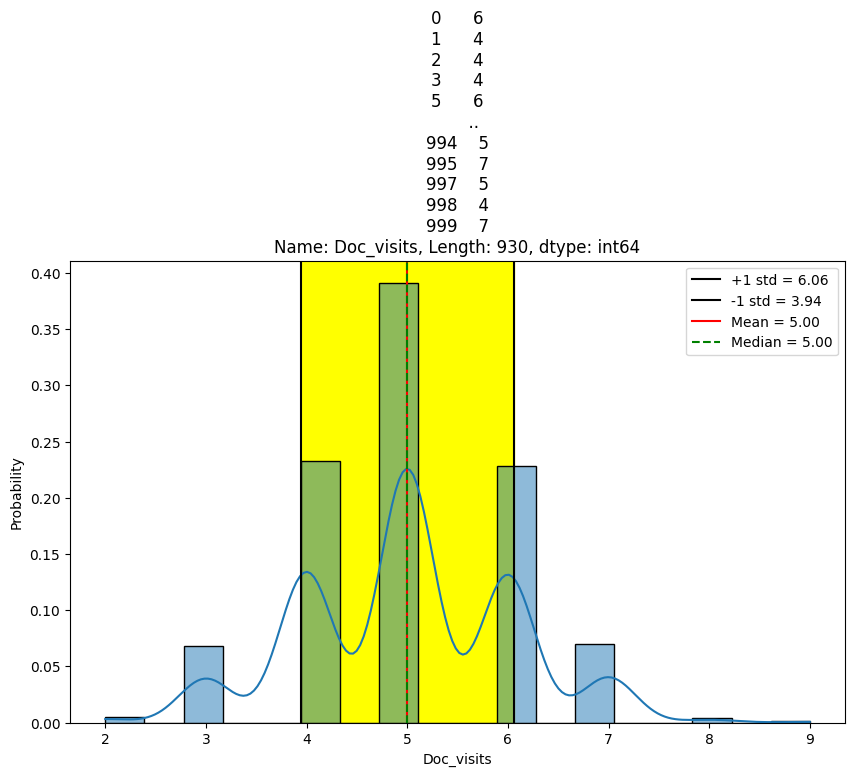

In [34]:
# Produce a histogram for the second column

feature = visits # Change feature to visits
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_1_std = mean + std
minus_1_std = mean - std

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(feature ,ax = ax, stat = 'probability', kde = True)

ax.axvline(plus_1_std, color = 'black', label = f'+1 std = {plus_1_std:,.2f}')
ax.axvline(minus_1_std, color = 'black', label = f'-1 std = {minus_1_std:,.2f}')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls = '--', color = 'green', label = f'Median = {median:,.2f}')

ax.axvspan(plus_1_std, minus_1_std, color = 'yellow', zorder = 0)
ax.set_title(f'{feature}')
ax.legend();

### Let's answer the questions posed to us for this histogram:
- Is it Discrete or Continuous?
  - This data is **Discrete**
- Does it have a skew? If so, which direction (+/-)
  - This data has a slight **Positive** skew
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
  - This data displays **Leptokurtic** Kurtosis

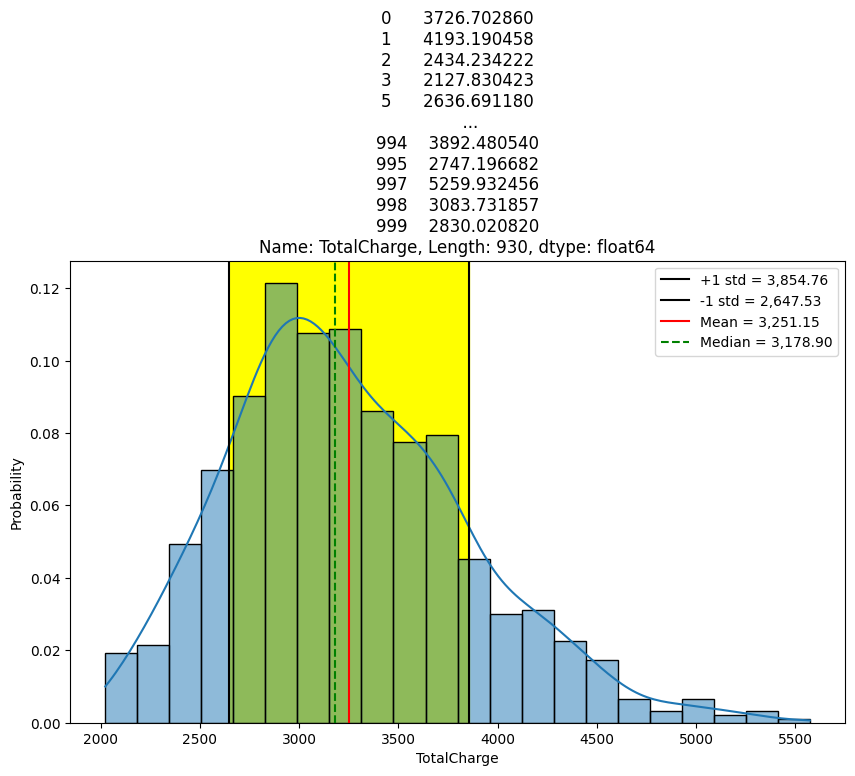

In [36]:
# Produce a histogram for the third column

feature = charge # Change feature to charge
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_1_std = mean + std
minus_1_std = mean - std

fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(feature ,ax = ax, stat = 'probability', kde = True)

ax.axvline(plus_1_std, color = 'black', label = f'+1 std = {plus_1_std:,.2f}')
ax.axvline(minus_1_std, color = 'black', label = f'-1 std = {minus_1_std:,.2f}')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, ls = '--', color = 'green', label = f'Median = {median:,.2f}')

ax.axvspan(plus_1_std, minus_1_std, color = 'yellow', zorder = 0)
ax.set_title(f'{feature}')
ax.legend();

### Let's answer the questions posed to us for this histogram:
- Is it Discrete or Continuous?
  - This data is **Continuous**
- Does it have a skew? If so, which direction (+/-)
  - This data has a **Positive** skew
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
  - This data displays **Mesokurtic** Kurtosis